In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Inspect for any missing values
data.isnull().sum()

# Encode categorical data if needed (e.g., Gender column)
data = pd.get_dummies(data, drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


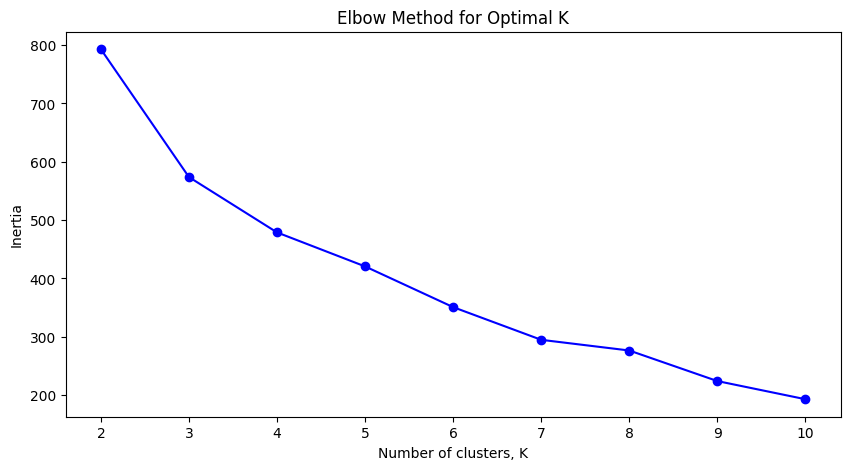

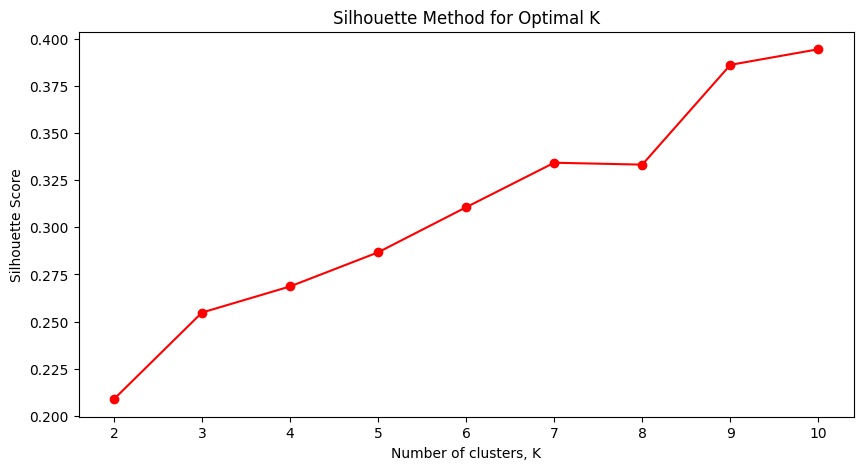

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

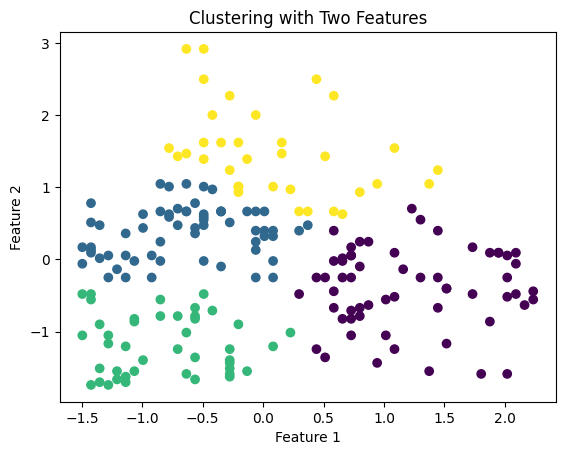

In [5]:
# Choose two features for clustering
data_2_features = scaled_data[:, [1, 2]]  # Adjust feature indices as needed

# Fit KMeans with optimal K found (e.g., K=4)
kmeans_2 = KMeans(n_clusters=4, random_state=0).fit(data_2_features)
data['Cluster_2'] = kmeans_2.labels_

# Plot clusters
plt.scatter(data_2_features[:, 0], data_2_features[:, 1], c=kmeans_2.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering with Two Features')
plt.show()


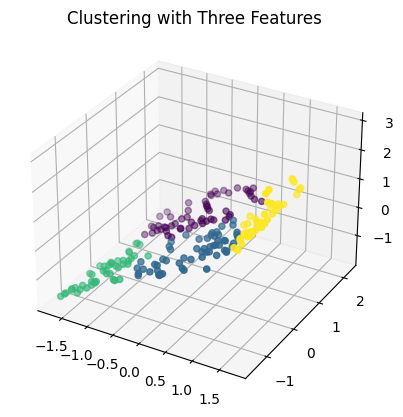

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Choose three features for clustering
data_3_features = scaled_data[:, :3]  # Adjust indices if necessary

# Fit KMeans with optimal K found (e.g., K=4)
kmeans_3 = KMeans(n_clusters=4, random_state=0).fit(data_3_features)
data['Cluster_3'] = kmeans_3.labels_

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3_features[:, 0], data_3_features[:, 1], data_3_features[:, 2], c=kmeans_3.labels_, cmap='viridis')
plt.title('Clustering with Three Features')
plt.show()


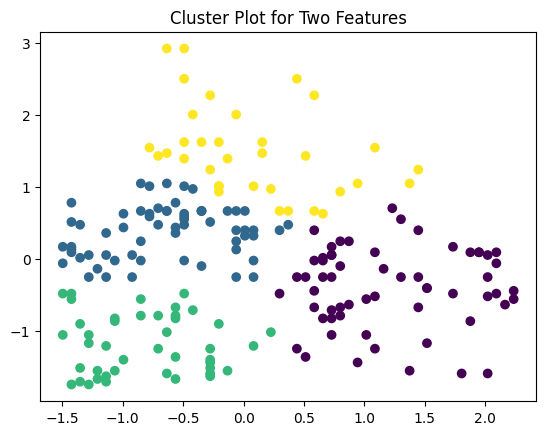

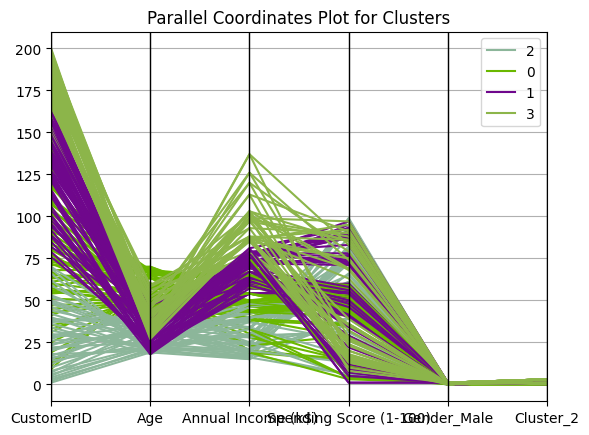

In [8]:
from pandas.plotting import parallel_coordinates

# Scatter plot
plt.scatter(data_2_features[:, 0], data_2_features[:, 1], c=data['Cluster_2'], cmap='viridis')
plt.title("Cluster Plot for Two Features")
plt.show()

# Parallel Coordinates Plot
data['Cluster_3'] = data['Cluster_3'].astype(str)  # Convert clusters to strings
parallel_coordinates(data, 'Cluster_3')
plt.title("Parallel Coordinates Plot for Clusters")
plt.show()


In [7]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, v_measure_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Extrinsic Measures
rand_index = adjusted_rand_score(data['Cluster_2'], data['Cluster_3'])
mutual_info = normalized_mutual_info_score(data['Cluster_2'], data['Cluster_3'])
v_measure = v_measure_score(data['Cluster_2'], data['Cluster_3'])
fowlkes_mallows = fowlkes_mallows_score(data['Cluster_2'], data['Cluster_3'])

# Intrinsic Measures
silhouette_coef = silhouette_score(scaled_data, kmeans_3.labels_)
calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans_3.labels_)
davies_bouldin = davies_bouldin_score(scaled_data, kmeans_3.labels_)

# Display results
print("Extrinsic Measures:")
print("Rand Index:", rand_index)
print("Mutual Information:", mutual_info)
print("V-measure:", v_measure)
print("Fowlkes-Mallows:", fowlkes_mallows)

print("\nIntrinsic Measures:")
print("Silhouette Coefficient:", silhouette_coef)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)


Extrinsic Measures:
Rand Index: 0.8701024237046884
Mutual Information: 0.8550809976676156
V-measure: 0.8550809976676158
Fowlkes-Mallows: 0.9033653948555956

Intrinsic Measures:
Silhouette Coefficient: 0.20820547974850867
Calinski-Harabasz Index: 58.678399905693716
Davies-Bouldin Index: 1.7518369144844885
